In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import warnings

%matplotlib inline

# Loading data set

In [2]:
raw_data = pd.read_csv('train_data.csv')
raw_data

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend,Income
0,1,0.0,0.0,1.0,10.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,Dec,Android,2,9,10,Returning_Visitor,no,1
1,2,0.0,0.0,2.0,15.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,May,Android,4,4,2,Returning_Visitor,no,0
2,3,0.0,0.0,1.0,85.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,Mar,Android,2,3,2,Returning_Visitor,no,0
3,4,0.0,0.0,5.0,175.1,26.0,615.559524,0.000000,0.002083,62.773672,0.0,Sep,Windows,1,1,3,New_Visitor,1,1
4,5,0.0,0.0,2.0,25.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,May,Android,2,1,1,Returning_Visitor,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,9939,0.0,0.0,0.0,0.0,8.0,376.333333,0.000000,0.028571,53.988000,0.0,May,Android,2,2,4,Returning_Visitor,1,1
9939,9940,1.0,46.5,1.0,0.0,22.0,671.866667,0.017391,0.020580,0.000000,0.0,Nov,iOS,2,7,10,Returning_Visitor,no,0
9940,9941,0.0,0.0,0.0,0.0,15.0,872.833333,0.000000,0.026667,0.000000,0.0,Mar,Android,2,2,3,Returning_Visitor,1,0
9941,9942,0.0,0.0,2.0,327.5,7.0,570.500000,0.000000,0.028571,0.000000,0.0,Nov,Android,2,2,2,Returning_Visitor,no,0


# Data Preprocessing

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9943 entries, 0 to 9942
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      9943 non-null   int64  
 1   Aboutus                 9928 non-null   float64
 2   Aboutus_Duration        9928 non-null   float64
 3   Item_page               9928 non-null   float64
 4   Item_page_Duration      9928 non-null   float64
 5   Checkout_page           9928 non-null   float64
 6   Checkout_page_Duration  9928 non-null   float64
 7   Bounce_Rates            9928 non-null   float64
 8   Exit_Rates              9928 non-null   float64
 9   Page_Values             9943 non-null   float64
 10  Remarkable_Day          9943 non-null   float64
 11  Month                   9943 non-null   object 
 12  Operating_Systems       9943 non-null   object 
 13  Browser                 9943 non-null   int64  
 14  Province                9943 non-null   

In [4]:
raw_data.isnull().sum()

ID                         0
Aboutus                   15
Aboutus_Duration          15
Item_page                 15
Item_page_Duration        15
Checkout_page             15
Checkout_page_Duration    15
Bounce_Rates              15
Exit_Rates                15
Page_Values                0
Remarkable_Day             0
Month                      0
Operating_Systems          0
Browser                    0
Province                   0
TrafficType                0
VisitorType                0
Weekend                    0
Income                     0
dtype: int64

In [6]:
# null_col = raw_data[['Aboutus','Aboutus_Duration','Item_page','Item_page_Duration','Checkout_page','Checkout_page_Duration',
#                     'Bounce_Rates','Exit_Rates']]

# for col in null_col:
#     raw_data = raw_data.fillna(raw_data[col].mean())
    
raw_data = raw_data.dropna()

raw_data.isnull().sum()

ID                        0
Aboutus                   0
Aboutus_Duration          0
Item_page                 0
Item_page_Duration        0
Checkout_page             0
Checkout_page_Duration    0
Bounce_Rates              0
Exit_Rates                0
Page_Values               0
Remarkable_Day            0
Month                     0
Operating_Systems         0
Browser                   0
Province                  0
TrafficType               0
VisitorType               0
Weekend                   0
Income                    0
dtype: int64

In [7]:
raw_data.duplicated().sum()

0

In [8]:
raw_data.shape

(9928, 19)

In [9]:
(raw_data['Income']==0).sum(), (raw_data['Income']==1).sum()

(8380, 1548)

In [10]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 30:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature ID :9928
The number of values for feature Aboutus :17 -- [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16. 24.]
The number of values for feature Aboutus_Duration :1067
The number of values for feature Item_page :27 -- [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 26. 27.]
The number of values for feature Item_page_Duration :2822
The number of values for feature Checkout_page :292
The number of values for feature Checkout_page_Duration :7830
The number of values for feature Bounce_Rates :1607
The number of values for feature Exit_Rates :3989
The number of values for feature Page_Values :2169
The number of values for feature Remarkable_Day :6 -- [0.  0.2 0.4 0.6 0.8 1. ]
The number of values for feature Month :10 -- ['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
The number of values for feature Operating_Systems :8 -- ['Android' 'CentOS' 'Fedora' 'Ubuntu' 'Windows' 'iOS

In [11]:
raw_data.columns

Index(['ID', 'Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates',
       'Page_Values', 'Remarkable_Day', 'Month', 'Operating_Systems',
       'Browser', 'Province', 'TrafficType', 'VisitorType', 'Weekend',
       'Income'],
      dtype='object')

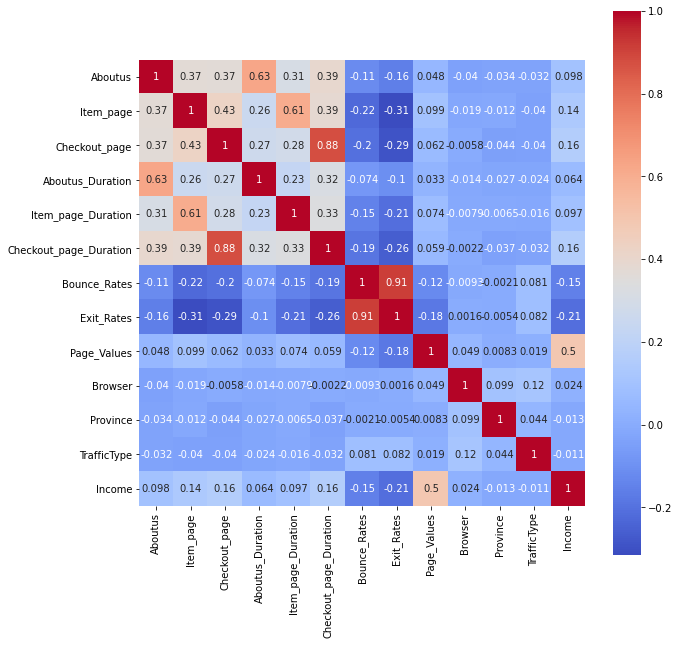

In [12]:
float_col = raw_data[['Aboutus','Item_page','Checkout_page','Aboutus_Duration','Item_page_Duration', 
                    'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates','Page_Values','Browser', 'Province', 'TrafficType',
                     'Income']]

plt.figure(figsize=(10,10))
sns.heatmap(float_col.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

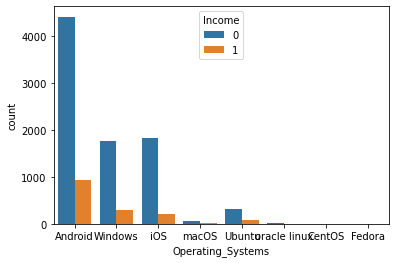

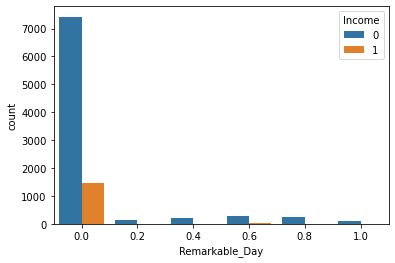

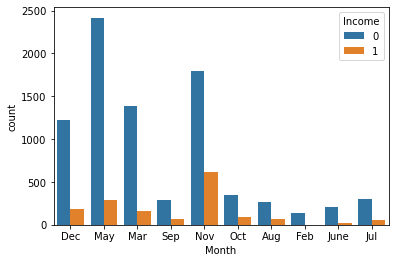

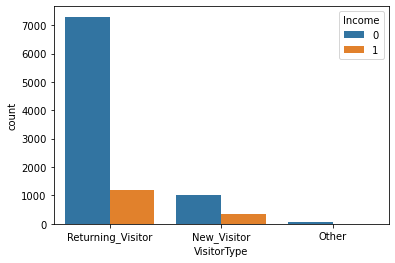

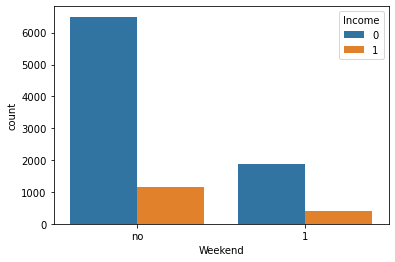

In [13]:
cat_columns = ['Operating_Systems','Remarkable_Day','Month','VisitorType','Weekend']

for col in cat_columns:
    plt.figure()
    ax = sns.countplot(x=col, data=raw_data, hue='Income')

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

raw_data['Operating_Systems'] = le.fit_transform(raw_data['Operating_Systems'])
# raw_data['Remarkable_Day'] = le.fit_transform(raw_data['Remarkable_Day'])
# raw_data['Month'] = le.fit_transform(raw_data['Month'])
# raw_data['VisitorType'] = le.fit_transform(raw_data['VisitorType'])
raw_data['Weekend'] = le.fit_transform(raw_data['Weekend'])

raw_data

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend,Income
0,1,0.0,0.0,1.0,10.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,Dec,0,2,9,10,Returning_Visitor,1,1
1,2,0.0,0.0,2.0,15.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,May,0,4,4,2,Returning_Visitor,1,0
2,3,0.0,0.0,1.0,85.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,Mar,0,2,3,2,Returning_Visitor,1,0
3,4,0.0,0.0,5.0,175.1,26.0,615.559524,0.000000,0.002083,62.773672,0.0,Sep,4,1,1,3,New_Visitor,0,1
4,5,0.0,0.0,2.0,25.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,May,0,2,1,1,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,9939,0.0,0.0,0.0,0.0,8.0,376.333333,0.000000,0.028571,53.988000,0.0,May,0,2,2,4,Returning_Visitor,0,1
9939,9940,1.0,46.5,1.0,0.0,22.0,671.866667,0.017391,0.020580,0.000000,0.0,Nov,5,2,7,10,Returning_Visitor,1,0
9940,9941,0.0,0.0,0.0,0.0,15.0,872.833333,0.000000,0.026667,0.000000,0.0,Mar,0,2,2,3,Returning_Visitor,0,0
9941,9942,0.0,0.0,2.0,327.5,7.0,570.500000,0.000000,0.028571,0.000000,0.0,Nov,0,2,2,2,Returning_Visitor,1,0


In [14]:
raw_data = pd.get_dummies(raw_data, columns=['Remarkable_Day','Month','VisitorType'])
raw_data

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,1,0.0,0.0,1.0,10.0,9.0,700.000000,0.000000,0.011111,29.621890,...,0,0,0,0,0,0,0,0,0,1
1,2,0.0,0.0,2.0,15.0,10.0,894.666667,0.000000,0.022222,0.000000,...,0,0,0,1,0,0,0,0,0,1
2,3,0.0,0.0,1.0,85.0,14.0,306.500000,0.000000,0.004444,0.000000,...,0,0,1,0,0,0,0,0,0,1
3,4,0.0,0.0,5.0,175.1,26.0,615.559524,0.000000,0.002083,62.773672,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,0.0,2.0,25.0,5.0,40.000000,0.066667,0.083333,0.000000,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,9939,0.0,0.0,0.0,0.0,8.0,376.333333,0.000000,0.028571,53.988000,...,0,0,0,1,0,0,0,0,0,1
9939,9940,1.0,46.5,1.0,0.0,22.0,671.866667,0.017391,0.020580,0.000000,...,0,0,0,0,1,0,0,0,0,1
9940,9941,0.0,0.0,0.0,0.0,15.0,872.833333,0.000000,0.026667,0.000000,...,0,0,1,0,0,0,0,0,0,1
9941,9942,0.0,0.0,2.0,327.5,7.0,570.500000,0.000000,0.028571,0.000000,...,0,0,0,0,1,0,0,0,0,1


In [15]:
raw_data.columns

Index(['ID', 'Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates',
       'Page_Values', 'Operating_Systems', 'Browser', 'Province',
       'TrafficType', 'Weekend', 'Income', 'Remarkable_Day_0.0',
       'Remarkable_Day_0.2', 'Remarkable_Day_0.4', 'Remarkable_Day_0.6',
       'Remarkable_Day_0.8', 'Remarkable_Day_1.0', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [16]:
raw_data2 = raw_data[['Aboutus', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Bounce_Rates','Page_Values', 'Operating_Systems', 'Province',
       'TrafficType', 'Income', 'Remarkable_Day_0.0',
       'Remarkable_Day_0.2', 'Remarkable_Day_0.4', 'Remarkable_Day_0.6',
       'Remarkable_Day_0.8', 'Remarkable_Day_1.0', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor']]



raw_data2

,Aboutus,Item_page,Item_page_Duration,Checkout_page,Bounce_Rates,Page_Values,Operating_Systems,Province,TrafficType,Income,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,1.0,10.0,9.0,0.000000,29.621890,0,9,10,1,...,0,0,0,0,0,0,0,0,0,1
1,0.0,2.0,15.0,10.0,0.000000,0.000000,0,4,2,0,...,0,0,0,1,0,0,0,0,0,1
2,0.0,1.0,85.0,14.0,0.000000,0.000000,0,3,2,0,...,0,0,1,0,0,0,0,0,0,1
3,0.0,5.0,175.1,26.0,0.000000,62.773672,4,1,3,1,...,0,0,0,0,0,0,1,1,0,0
4,0.0,2.0,25.0,5.0,0.066667,0.000000,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,0.0,0.0,0.0,8.0,0.000000,53.988000,0,2,4,1,...,0,0,0,1,0,0,0,0,0,1
9939,1.0,1.0,0.0,22.0,0.017391,0.000000,5,7,10,0,...,0,0,0,0,1,0,0,0,0,1
9940,0.0,0.0,0.0,15.0,0.000000,0.000000,0,2,3,0,...,0,0,1,0,0,0,0,0,0,1
9941,0.0,2.0,327.5,7.0,0.000000,0.000000,0,2,2,0,...,0,0,0,0,1,0,0,0,0,1


In [17]:
# Scaling our columns
# normalizing some variables 
scale_vars = ['Aboutus', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Bounce_Rates','Page_Values', 'Province', 'TrafficType']

scaler = MinMaxScaler()
raw_data2[scale_vars] = scaler.fit_transform(raw_data2[scale_vars])
raw_data2

<ipython-input-17-ee1ca131cc6e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data2[scale_vars] = scaler.fit_transform(raw_data2[scale_vars])
C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Aboutus,Item_page,Item_page_Duration,Checkout_page,Bounce_Rates,Page_Values,Operating_Systems,Province,TrafficType,Income,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.037037,0.004138,0.012766,0.000000,0.082066,0,1.000,0.473684,1,...,0,0,0,0,0,0,0,0,0,1
1,0.000000,0.074074,0.006019,0.014184,0.000000,0.000000,0,0.375,0.052632,0,...,0,0,0,1,0,0,0,0,0,1
2,0.000000,0.037037,0.032351,0.019858,0.000000,0.000000,0,0.250,0.052632,0,...,0,0,1,0,0,0,0,0,0,1
3,0.000000,0.185185,0.066245,0.036879,0.000000,0.173911,4,0.000,0.105263,1,...,0,0,0,0,0,0,1,1,0,0
4,0.000000,0.074074,0.009781,0.007092,0.133065,0.000000,0,0.000,0.000000,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,0.000000,0.000000,0.000376,0.011348,0.000000,0.149571,0,0.125,0.157895,1,...,0,0,0,1,0,0,0,0,0,1
9939,0.041667,0.037037,0.000376,0.031206,0.034713,0.000000,5,0.750,0.473684,0,...,0,0,0,0,1,0,0,0,0,1
9940,0.000000,0.000000,0.000376,0.021277,0.000000,0.000000,0,0.125,0.105263,0,...,0,0,1,0,0,0,0,0,0,1
9941,0.000000,0.074074,0.123574,0.009929,0.000000,0.000000,0,0.125,0.052632,0,...,0,0,0,0,1,0,0,0,0,1


# Splitting

In [22]:
# Your code goes here
X = raw_data2.drop('Income', axis=1).values# Input features (attributes)
y = raw_data2['Income'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

X shape: (9943, 28)
y shape: (9943,)


# Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

In [20]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy is:  0.9995764955002647
Testing Accuracy is:  0.929718875502008
Confusion Matrix for Testing: 
 [[414   9]
 [ 26  49]]


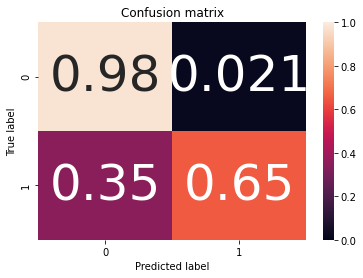

In [24]:
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)

cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

print('Confusion Matrix for Testing: \n' ,cm)

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(raw_data2.drop('Income', axis=1),raw_data2['Income'])

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(raw_data2.drop('Income', axis=1).columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs       Score
5               Page_Values  384.763633
22                Month_Nov  176.420457
6         Operating_Systems  110.193043
25  VisitorType_New_Visitor  106.111954
4              Bounce_Rates   50.785488
21                Month_May   46.747118
20                Month_Mar   32.895317
1                 Item_page   32.329784
13       Remarkable_Day_0.8   29.695413
3             Checkout_page   23.076754


In [27]:
#del final_fi

# Calculating FI
for i, column in enumerate(raw_data2.drop('Income', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, rf.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [rf.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature Aboutus:, 0.031
Importance of feature Item_page:, 0.058
Importance of feature Item_page_Duration:, 0.080
Importance of feature Checkout_page:, 0.123
Importance of feature Bounce_Rates:, 0.093
Importance of feature Page_Values:, 0.374
Importance of feature Operating_Systems:, 0.028
Importance of feature Province:, 0.049
Importance of feature TrafficType:, 0.050
Importance of feature Remarkable_Day_0.0:, 0.004
Importance of feature Remarkable_Day_0.2:, 0.001
Importance of feature Remarkable_Day_0.4:, 0.001
Importance of feature Remarkable_Day_0.6:, 0.001
Importance of feature Remarkable_Day_0.8:, 0.001
Importance of feature Remarkable_Day_1.0:, 0.001
Importance of feature Month_Aug:, 0.005
Importance of feature Month_Dec:, 0.008
Importance of feature Month_Feb:, 0.001
Importance of feature Month_Jul:, 0.004
Importance of feature Month_June:, 0.003
Importance of feature Month_Mar:, 0.011
Importance of feature Month_May:, 0.015
Importance of feature Month_Nov:, 0.027


,index,Variable,Feature Importance Score
0,5,Page_Values,0.373968
1,3,Checkout_page,0.122511
2,4,Bounce_Rates,0.092923
3,2,Item_page_Duration,0.080403
4,1,Item_page,0.058372
5,8,TrafficType,0.049906
6,7,Province,0.049186
7,0,Aboutus,0.031048
8,6,Operating_Systems,0.028358
9,22,Month_Nov,0.026624


In [28]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

The True Positive rate / Recall per class is:  [0.9787234  0.65333333]
The Precision per class is:  [0.94090909 0.84482759]
The False Alarm rate per class is:  [0.34666667 0.0212766 ]
The Miss Rate rate per class is:  [0.0212766  0.34666667]
The Classification error of each class is [0.07028112 0.07028112]
The Accuracy of each class is [0.92971888 0.92971888]

The average Recall is:  0.8160283687943262
The average Precision is:  0.8928683385579937
The average False Alarm is:  0.18397163120567375
The average Miss Rate rate is:  0.18397163120567375
The average Classification error is 0.07028112449799197
The average Accuracy is 0.929718875502008


# Unseen dataset

In [29]:
testing_dataset = pd.read_csv('test_data.csv')
testing_dataset

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend
0,1,0,0.0,12,569.825000,127,6065.016218,0.006716,0.009265,0.152167,0.0,Aug,Windows,1,2,4,Returning_Visitor,no
1,2,0,0.0,0,0.000000,25,770.028571,0.011200,0.034933,0.000000,0.0,Mar,iOS,2,8,10,Returning_Visitor,no
2,3,0,0.0,7,38.600000,70,1087.700000,0.000000,0.004861,0.000000,0.0,Oct,Android,2,4,5,Returning_Visitor,no
3,4,0,0.0,4,105.266667,35,655.684762,0.000000,0.005128,0.000000,0.0,Nov,Android,10,7,2,New_Visitor,1
4,5,0,0.0,0,0.000000,3,63.000000,0.000000,0.066667,0.000000,0.8,May,Windows,1,9,1,Returning_Visitor,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.0,0,0.000000,2,4.000000,0.000000,0.100000,0.000000,0.8,May,Android,5,4,1,Returning_Visitor,no
996,997,0,0.0,1,43.000000,36,2362.500000,0.000000,0.016190,0.000000,0.6,May,Android,5,1,4,Returning_Visitor,no
997,998,0,0.0,0,0.000000,25,1017.966667,0.008333,0.017361,0.000000,0.0,Aug,iOS,2,4,1,Returning_Visitor,1
998,999,0,0.0,0,0.000000,18,587.733333,0.000000,0.022222,32.523808,0.0,Nov,Android,2,7,4,Returning_Visitor,1


In [30]:
testing_dataset.shape

(1000, 18)

In [31]:
# Investigate all the elements whithin each Feature 

for column in testing_dataset:
    unique_vals = np.unique(testing_dataset[column])
    nr_values = len(unique_vals)
    if nr_values < 30:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature ID :1000
The number of values for feature Aboutus :11 -- [ 0  1  2  3  4  5  6  7  8  9 11]
The number of values for feature Aboutus_Duration :148
The number of values for feature Item_page :19 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 24]
The number of values for feature Item_page_Duration :422
The number of values for feature Checkout_page :124
The number of values for feature Checkout_page_Duration :891
The number of values for feature Bounce_Rates :283
The number of values for feature Exit_Rates :545
The number of values for feature Page_Values :236
The number of values for feature Remarkable_Day :6 -- [0.  0.2 0.4 0.6 0.8 1. ]
The number of values for feature Month :10 -- ['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
The number of values for feature Operating_Systems :6 -- ['Android' 'Ubuntu' 'Windows' 'iOS' 'macOS' 'oracle linux']
The number of values for feature Browser :11 -- [ 1  2  3  4  5  6  7  8 10 12 13]
Th

In [32]:
testing_dataset['Operating_Systems'] = le.fit_transform(testing_dataset['Operating_Systems'])
# testing_dataset['Remarkable_Day'] = le.fit_transform(testing_dataset['Remarkable_Day'])
# testing_dataset['Month'] = le.fit_transform(testing_dataset['Month'])
# testing_dataset['VisitorType'] = le.fit_transform(testing_dataset['VisitorType'])
testing_dataset['Weekend'] = le.fit_transform(testing_dataset['Weekend'])

testing_dataset

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend
0,1,0,0.0,12,569.825000,127,6065.016218,0.006716,0.009265,0.152167,0.0,Aug,2,1,2,4,Returning_Visitor,1
1,2,0,0.0,0,0.000000,25,770.028571,0.011200,0.034933,0.000000,0.0,Mar,3,2,8,10,Returning_Visitor,1
2,3,0,0.0,7,38.600000,70,1087.700000,0.000000,0.004861,0.000000,0.0,Oct,0,2,4,5,Returning_Visitor,1
3,4,0,0.0,4,105.266667,35,655.684762,0.000000,0.005128,0.000000,0.0,Nov,0,10,7,2,New_Visitor,0
4,5,0,0.0,0,0.000000,3,63.000000,0.000000,0.066667,0.000000,0.8,May,2,1,9,1,Returning_Visitor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.0,0,0.000000,2,4.000000,0.000000,0.100000,0.000000,0.8,May,0,5,4,1,Returning_Visitor,1
996,997,0,0.0,1,43.000000,36,2362.500000,0.000000,0.016190,0.000000,0.6,May,0,5,1,4,Returning_Visitor,1
997,998,0,0.0,0,0.000000,25,1017.966667,0.008333,0.017361,0.000000,0.0,Aug,3,2,4,1,Returning_Visitor,0
998,999,0,0.0,0,0.000000,18,587.733333,0.000000,0.022222,32.523808,0.0,Nov,0,2,7,4,Returning_Visitor,0


In [33]:
testing_dataset = pd.get_dummies(testing_dataset, columns=['Remarkable_Day','Month',
                                                           'VisitorType'])
testing_dataset

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,1,0,0.0,12,569.825000,127,6065.016218,0.006716,0.009265,0.152167,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0.0,0,0.000000,25,770.028571,0.011200,0.034933,0.000000,...,0,0,1,0,0,0,0,0,0,1
2,3,0,0.0,7,38.600000,70,1087.700000,0.000000,0.004861,0.000000,...,0,0,0,0,0,1,0,0,0,1
3,4,0,0.0,4,105.266667,35,655.684762,0.000000,0.005128,0.000000,...,0,0,0,0,1,0,0,1,0,0
4,5,0,0.0,0,0.000000,3,63.000000,0.000000,0.066667,0.000000,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.0,0,0.000000,2,4.000000,0.000000,0.100000,0.000000,...,0,0,0,1,0,0,0,0,0,1
996,997,0,0.0,1,43.000000,36,2362.500000,0.000000,0.016190,0.000000,...,0,0,0,1,0,0,0,0,0,1
997,998,0,0.0,0,0.000000,25,1017.966667,0.008333,0.017361,0.000000,...,0,0,0,0,0,0,0,0,0,1
998,999,0,0.0,0,0.000000,18,587.733333,0.000000,0.022222,32.523808,...,0,0,0,0,1,0,0,0,0,1


In [34]:
testing_dataset.columns

Index(['ID', 'Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates',
       'Page_Values', 'Operating_Systems', 'Browser', 'Province',
       'TrafficType', 'Weekend', 'Remarkable_Day_0.0', 'Remarkable_Day_0.2',
       'Remarkable_Day_0.4', 'Remarkable_Day_0.6', 'Remarkable_Day_0.8',
       'Remarkable_Day_1.0', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [35]:
new_testing_dataset = testing_dataset[['Aboutus', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Bounce_Rates','Page_Values', 'Operating_Systems', 'Province',
       'TrafficType', 'Remarkable_Day_0.0',
       'Remarkable_Day_0.2', 'Remarkable_Day_0.4', 'Remarkable_Day_0.6',
       'Remarkable_Day_0.8', 'Remarkable_Day_1.0', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor']]

new_testing_dataset

,Aboutus,Item_page,Item_page_Duration,Checkout_page,Bounce_Rates,Page_Values,Operating_Systems,Province,TrafficType,Remarkable_Day_0.0,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,12,569.825000,127,0.006716,0.152167,2,2,4,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.000000,25,0.011200,0.000000,3,8,10,1,...,0,0,1,0,0,0,0,0,0,1
2,0,7,38.600000,70,0.000000,0.000000,0,4,5,1,...,0,0,0,0,0,1,0,0,0,1
3,0,4,105.266667,35,0.000000,0.000000,0,7,2,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0.000000,3,0.000000,0.000000,2,9,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0.000000,2,0.000000,0.000000,0,4,1,0,...,0,0,0,1,0,0,0,0,0,1
996,0,1,43.000000,36,0.000000,0.000000,0,1,4,0,...,0,0,0,1,0,0,0,0,0,1
997,0,0,0.000000,25,0.008333,0.000000,3,4,1,1,...,0,0,0,0,0,0,0,0,0,1
998,0,0,0.000000,18,0.000000,32.523808,0,7,4,1,...,0,0,0,0,1,0,0,0,0,1


In [36]:
# Scaling our columns
# normalizing some variables 
scale_vars = ['Aboutus', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Bounce_Rates','Page_Values', 'Province', 'TrafficType']

scaler = MinMaxScaler()
new_testing_dataset[scale_vars] = scaler.fit_transform(new_testing_dataset[scale_vars])
new_testing_dataset

<ipython-input-36-fc79cc21da56>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_testing_dataset[scale_vars] = scaler.fit_transform(new_testing_dataset[scale_vars])
C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Aboutus,Item_page,Item_page_Duration,Checkout_page,Bounce_Rates,Page_Values,Operating_Systems,Province,TrafficType,Remarkable_Day_0.0,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.500000,0.415296,0.477444,0.033582,0.000421,2,0.125,0.157895,1,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.000000,0.000728,0.093985,0.056000,0.000000,3,0.875,0.473684,1,...,0,0,1,0,0,0,0,0,0,1
2,0.0,0.291667,0.028810,0.263158,0.000000,0.000000,0,0.375,0.210526,1,...,0,0,0,0,0,1,0,0,0,1
3,0.0,0.166667,0.077313,0.131579,0.000000,0.000000,0,0.750,0.052632,1,...,0,0,0,0,1,0,0,1,0,0
4,0.0,0.000000,0.000728,0.011278,0.000000,0.000000,2,1.000,0.000000,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.000000,0.000728,0.007519,0.000000,0.000000,0,0.375,0.000000,0,...,0,0,0,1,0,0,0,0,0,1
996,0.0,0.041667,0.032012,0.135338,0.000000,0.000000,0,0.000,0.157895,0,...,0,0,0,1,0,0,0,0,0,1
997,0.0,0.000000,0.000728,0.093985,0.041667,0.000000,3,0.375,0.000000,1,...,0,0,0,0,0,0,0,0,0,1
998,0.0,0.000000,0.000728,0.067669,0.000000,0.089903,0,0.750,0.157895,1,...,0,0,0,0,1,0,0,0,0,1


In [37]:
X_new = new_testing_dataset.values
X_new.shape

(1000, 28)

In [38]:
pred_test = rf.predict(X_new)

pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [39]:
print((pred_test == 0).sum())

897


In [45]:
output = testing_dataset.copy()
output['Predictions - Income or Not'] = pred_test
output['Income'] = 'Empty'
output['Income'][output['Predictions - Income or Not'] == 0] = 0
output['Income'][output['Predictions - Income or Not'] == 1] = 1
output.head()

<ipython-input-45-f40f1da640f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Income'][output['Predictions - Income or Not'] == 0] = 0
<ipython-input-45-f40f1da640f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Income'][output['Predictions - Income or Not'] == 1] = 1


,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend,Predictions - Income or Not,Income
0,1,0,0.0,12,569.825000,127,6065.016218,0.006716,0.009265,0.152167,0,0,2,1,2,4,2,1,0,0
1,2,0,0.0,0,0.000000,25,770.028571,0.011200,0.034933,0.000000,0,5,3,2,8,10,2,1,0,0
2,3,0,0.0,7,38.600000,70,1087.700000,0.000000,0.004861,0.000000,0,8,0,2,4,5,2,1,0,0
3,4,0,0.0,4,105.266667,35,655.684762,0.000000,0.005128,0.000000,0,7,0,10,7,2,0,0,0,0
4,5,0,0.0,0,0.000000,3,63.000000,0.000000,0.066667,0.000000,4,6,2,1,9,1,2,1,0,0


In [46]:
final_output = output[['ID', 'Income']]
final_output

,ID,Income
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
995,996,0
996,997,0
997,998,0
998,999,1


In [47]:
import os

final_output.to_csv('new.csv', sep=',')

os. getcwd() 

'C:\\Users\\Raisul Zulfikar\\Desktop\\Data Rush1.0'